### *Anaylse and Visuzalazation Sentiment Pattern in Socal Media:Twitter*

### *Dataset Introduction*
---
- *This dataset contains tweets related to various topics or entities, along with sentiment analysis. The data is collected from Twitter and focuses on capturing user opinions and experiences shared via `tweets.` The tweets are categorized by sentiment, and each entry includes information about the entity being discussed. This type of dataset can be useful for analyzing public opinon, tracking brand reputation, and identifying key topics or trends.*
---

 ### *Import necessary libraries*

In [1496]:
# Import necessary libraries
import pandas as pd  
import numpy as np  
import re                       # For regular expressions to clean text
import matplotlib.pyplot as plt
import seaborn as sns  
from wordcloud import WordCloud  # For generating word clouds from text data
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
import warnings                        # For handling warnings in the code
warnings.filterwarnings("ignore") 

### *Load the dataset*

In [1497]:
sentiment= pd.read_csv('Twitter.csv', header=None)
# Assign column names manually
sentiment.columns = ['Tweet_id','Entity', 'Sentiment',  'Tweet_Text']
sentiment.head()

,Tweet_id,Entity,Sentiment,Tweet_Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


#### *Columns description*
*`Tweet ID:`*
    Description: A unique identifier assigned to each tweet. This ID is essential for referencing individual tweets within the dataset and for linking them to other relevant data if needed (e.g., `replies, retweets`).

*`Sentiment:`*
    Description: The sentiment classification of the tweet, which can typically be `Positive, Negative, or Neutral`. This sentiment is usually 
    determined through `natural language processing (NLP)` techniques to understand the general emotion conveyed in the tweet.

*`Entity:`*
    Description: The entity or brand being discussed in the tweet. This could refer to a *company, product, or any other notable subject*being mentioned or referenced. For example, the entity might be "Borderlands" or "Madden NFL" if the tweet is discussing a specific video game.

*`Tweet Text:`*
    Description: The full text of the tweet, which contains the user's opinion, feedback, or statement. This column allows us to perform detailed analysis, such as extracting specific keywords or phrases associated with particular sentiments or entities.

### *Data Cleaning*

In [1498]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tweet_id    74682 non-null  int64 
 1   Entity      74682 non-null  object
 2   Sentiment   74682 non-null  object
 3   Tweet_Text  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


#### *Observations*
---
- *The dataset contains:`74682` enties in total.*

- *While it contains four colomns :`Tweet_id`, ` Entity`,`Sentiment` and `Tweet_Text `. Which has been renamed.*

- *There is missing values in  `Tweet Text ` have  `73,996 non-null values.`*

---


### *Handling Missing Values*

In [1499]:
# Remove rows with missing 'Tweet Text'
sentiment = sentiment.dropna(subset=['Tweet_Text'])

##### *Checking after dropping the coloumn*

In [1500]:
# Verify the result by checking the data again
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tweet_id    73996 non-null  int64 
 1   Entity      73996 non-null  object
 2   Sentiment   73996 non-null  object
 3   Tweet_Text  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


#### *Descrption* 
- *`Reasonablly minimal Data Loss:`
With only 686 missing values out of 74,682 rows, removing these rows has a minimal impact on the overall dataset size. The loss is small compared to the total amount of data, ensuring that the analysis will still be representative.*
- *filling with` unkown` will lead to misinformation that when anaylizing later will describe as` unkown `comment instead of missing values.*



#### Checking for Duplicates

In [1501]:
# Check if there are any duplicate rows
print(f'Duplicated Values:', sentiment.duplicated().sum())

Duplicated Values: 2341


####  Dropping Duplicate Rows

In [1502]:
# Drop duplicate rows from the DataFrame
sentiment.drop_duplicates(inplace=True)

##### *Confirmation*

In [1503]:
sentiment.duplicated().sum()

0

### *Cleaning the Tweet_Text*

---
- *Tweets are typically written informally, and they may contain elements `(such as URLs, mentions, hashtags, or special characters)` that are not useful or might even interfere with the analysis of sentiment or key words. Cleaning the text ensures that we're working with a consistent format that focuses on the actual words , which improves the accuracy of sentiment analysis and other text-based tasks.*

- Example: *"Great job @johnDoe!" becomes "Great job !"*
---

In [1504]:
# Function to clean text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove mentions (e.g., @username)
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    
    # Remove special characters and numbers, keeping only alphabets and spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    return text

# Apply the cleaning function and update the existing 'Tweet_Text' column
sentiment['Tweet_Text'] = sentiment['Tweet_Text'].apply(lambda x: clean_text(str(x)))

# Display the last 10 rows to confirm the updates
sentiment.tail()


,Tweet_id,Entity,Sentiment,Tweet_Text
74677,9200,Nvidia,Positive,just realized that the windows partition of my...
74678,9200,Nvidia,Positive,just realized that my mac window partition is ...
74679,9200,Nvidia,Positive,just realized the windows partition of my mac ...
74680,9200,Nvidia,Positive,just realized between the windows partition of...
74681,9200,Nvidia,Positive,just like the windows partition of my mac is l...


### *` Now we can work on the dataset `*

### *Exploratory Data Analysis*


### *Sentiment Classification of Tweet Lengths by Sentiment Category*

In [1505]:
# Step 2: Get Counts for tweet lengths by sentiment
sentiment_counts= round(sentiment.groupby('Sentiment')['Tweet_Text'].count(),2)

# Display the results
print("Tweet Length Analysis by Sentiment:")
print(sentiment_counts)


Tweet Length Analysis by Sentiment:
Sentiment
Irrelevant    12537
Negative      21698
Neutral       17707
Positive      19713
Name: Tweet_Text, dtype: int64


---

#### *Observation*
---

- *Negative sentiment: **21,698** tweets*

- *Positive sentiment: **19,713** tweets*

- *Neutral sentiment: **17,707** tweets*

- *Irrelevant sentiment: **12,537** tweets*

---


#### *Remove irrelevant tweets*
---
- *Since the data have `Irrelevant sentiment` has **12,537** tweets, which might include off-topic content,Non-sentiment-related content,Empty or minimal content, spam, or tweets that do not express a clear sentiment related to the discussion.*
- *Removing irrelevant tweets ensures that the dataset is composed only of tweets that provide valuable information for sentiment analysis.*
---
 

In [1506]:
# Remove rows with 'Irrelevant' sentiment directly in the existing dataset
sentiment = sentiment[sentiment['Sentiment'] != 'Irrelevant']


In [1507]:
# Recalculate sentiment counts for the filtered data
sentiment_counts = sentiment['Sentiment'].value_counts()

#### *Visualization for Sentiment Distribution*

In [1508]:
# Convert the counts to a DataFrame for easier plotting
sentiment_counts_df = sentiment_counts.reset_index()
sentiment_counts_df.columns = ['Sentiment', 'Count']

# Sort by 'Count' in descending order for better clarity
sentiment_counts_df = sentiment_counts_df.sort_values(by='Count', ascending=False)

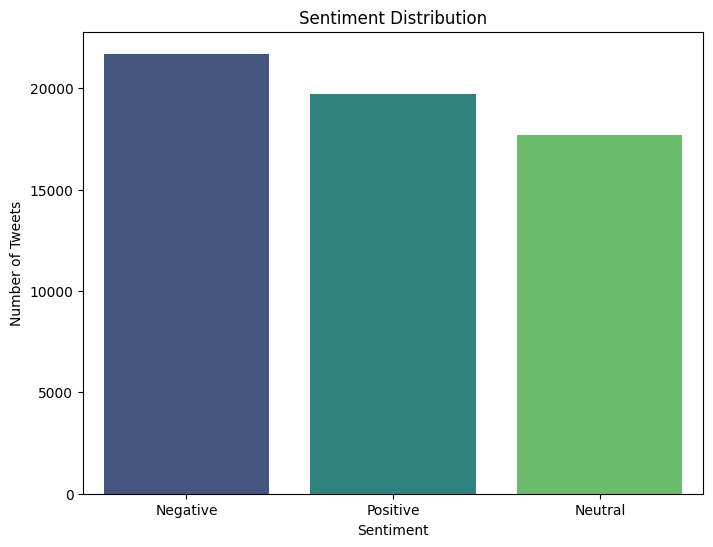

In [1509]:
# Plot the sentiment distribution using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Sentiment', y='Count', data=sentiment_counts_df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

---

####  `Interpretation of the Tweet Length Analysis by Sentiment:`
---

- *`Negative sentiment` is the most dominant category, with **21,698** tweets. This indicates that a significant number of people are sharing critical or unfavorable opinions about the topic or entity being discussed, suggesting dissatisfaction or negative feedback.*

- *`Positive sentiment` follows, with around **19,713** tweets. This shows that while there are a considerable number of supportive or favorable opinions, they are fewer than the negative sentiments, indicating mixed reactions.*

- *`Neutral sentiment` accounts for approximately **17,707** tweets. This suggests that there is a substantial amount of content where opinions are balanced or objective, focusing on neutral discussions or fact-based statements.*

---

### 

### *Generate Word Clouds for "Positive" and "Negative" Sentiments*

### *`Positive`*

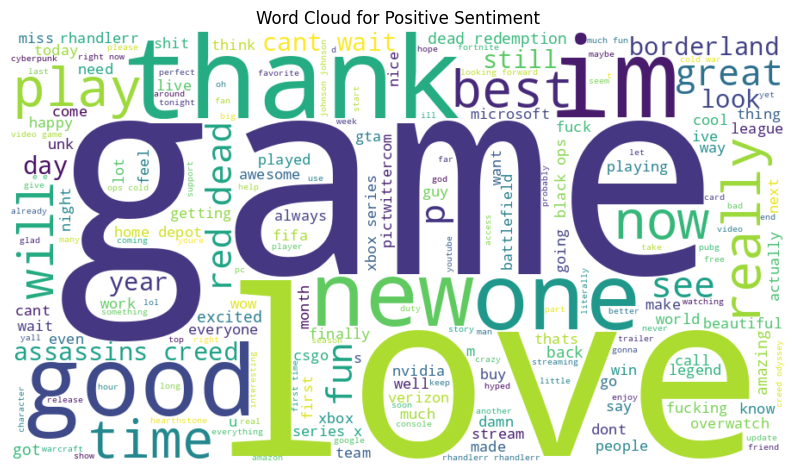

In [1510]:
# Function to generate word cloud
def generate_wordcloud(sentiment_df, sentiment):
    # Combine all text in the selected sentiment group
    text = ' '.join(sentiment_df[sentiment_df['Sentiment'] == sentiment]['Tweet_Text'])
    wordcloud = WordCloud(width=900, height=500, background_color='white').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()

# Generate word clouds for each sentiment type
generate_wordcloud(sentiment, 'Positive')

##### *Observation*
--- 
- *Words such as: `game`, `love`, `im`, `good`, `thank`, `play`, `new`, `great`, `really`, `now`, and `best` predominantly appear in the positive sentiment word cloud.*

#### *Interpretation*

*In the **Positive Sentiment Word Cloud**, larger words indicate higher usage frequency. The prominence of words like *"love," "game," "thank," "play,"* and *"fun"* highlights that users are sharing enthusiastic, appreciative, and enjoyable experiences. Terms such as *"amazing," "great," "good,"* and *"awesome"* further reinforce the positive tone. Additionally, popular game titles like *"Overwatch"* and *"Assassin's Creed"* frequently appear, suggesting these games are often linked with positive feedback.*

*This indicates a strong community of gamers and entertainment enthusiasts expressing satisfaction and gratitude, reflecting a positive reception of their gaming experiences.*

### *`Negative`*

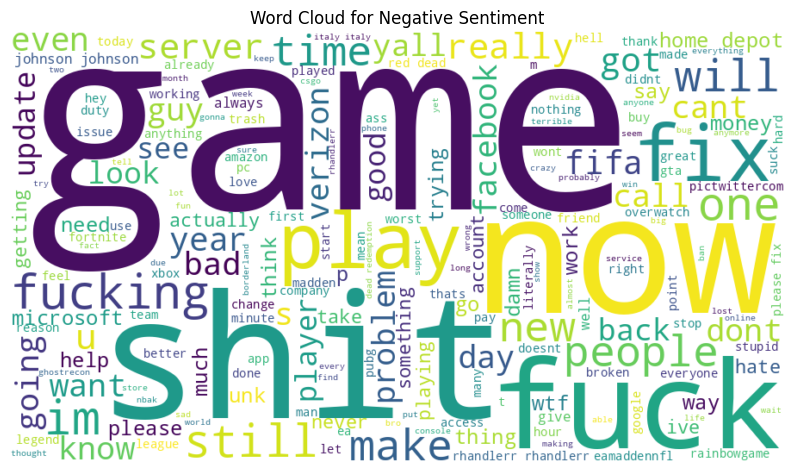

In [1511]:
generate_wordcloud(sentiment, 'Negative')

##### *Observation*
---
- *Words such as `shit`, `fuck`, `fucking`, `problem`, `bad`, `hate`, `hard`, `worst`, `crazy`, `suck`, `damn`, along with `can't`, `don't`, and `terrible` are prominent in the negative sentiment word cloud. These terms reflect strong negative emotions, frustration, and dissatisfaction.*

### *Interpretation*

- *In the **Negative Sentiment Word Cloud**, the presence of words like *"fix," "server," "play,"* and *"fucking"* highlights widespread frustration, especially related to game functionality and server performance issues. Additionally, terms such as *"problem," "issue," "money,"* and *"cant"* suggest dissatisfaction with technical glitches, bugs, or potentially in-game purchases.*

- *Specific games like *"FIFA"* and companies like *"Microsoft"* are mentioned, indicating sources of user frustration. This reflects a community expressing dissatisfaction with gaming experiences, technology, and customer service, pointing to potential areas for improvement.*

## *Entity-Wise Sentiment Analysis*

In [1512]:
# Get the unique values from the 'entity' column
unique_entities = sentiment['Entity'].unique()

# Display the unique entities
print(unique_entities)

['Borderlands' 'CallOfDutyBlackopsColdWar' 'Amazon' 'Overwatch'
 'Xbox(Xseries)' 'NBA2K' 'Dota2' 'PlayStation5(PS5)' 'WorldOfCraft'
 'CS-GO' 'Google' 'AssassinsCreed' 'ApexLegends' 'LeagueOfLegends'
 'Fortnite' 'Microsoft' 'Hearthstone' 'Battlefield'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Verizon' 'HomeDepot' 'FIFA'
 'RedDeadRedemption(RDR)' 'CallOfDuty' 'TomClancysRainbowSix' 'Facebook'
 'GrandTheftAuto(GTA)' 'MaddenNFL' 'johnson&johnson' 'Cyberpunk2077'
 'TomClancysGhostRecon' 'Nvidia']


#### *Description*
---
#### *Breakdown of Unique Column Values*
### *Video Games*
- ***First-Person Shooters***:  
  - *This category includes popular titles such as 'Borderlands', 'CallOfDutyBlackopsColdWar', 'CS-GO', 'Battlefield', 'CallOfDuty', 'TomClancysRainbowSix', 'TomClancysGhostRecon'.*  
  - *These games typically attract discussions around gameplay mechanics, graphics, and online multiplayer experiences.*

- ***Role-Playing Games (RPGs)***:  
  - *Games like 'Cyberpunk2077', 'AssassinsCreed', 'RedDeadRedemption(RDR)', 'GrandTheftAuto(GTA)' fall under this category.*  
  - *Feedback here often focuses on storyline depth, character development, and immersive worlds.*

- ***Sports Games***:  
  - *Titles such as 'NBA2K', 'FIFA', 'MaddenNFL' are prevalent in this category.*  
  - *Users may discuss aspects like realism, player updates, and game physics.*

- ***Multiplayer Online Battle Arena (MOBA)***:  
  - *Popular games include 'Dota2', 'LeagueOfLegends'.*  
  - *Topics may involve strategy, team coordination, and updates to gameplay balance.*

- ***Battle Royale Games***:  
  - *This includes highly engaging titles like 'ApexLegends', 'Fortnite', 'PlayerUnknownsBattlegrounds(PUBG)'.*  
  - *Conversations often center on game updates, seasonal events, and competitive play.*

- ***Others***:  
  - *This category includes games like 'Overwatch', 'WorldOfCraft', 'Hearthstone' which span across various genres and fan communities.*

### *Gaming Platforms*
- *Platforms such as 'Xbox(Xseries)' and 'PlayStation5(PS5)' are highlighted.*  
  - *Users may share their experiences related to hardware performance, exclusive titles, and platform services.*

### *Technology and Service Providers*
- *Major tech companies like 'Google', 'Microsoft', 'Verizon', 'Nvidia', 'Amazon', 'Facebook', 'HomeDepot' appear frequently.*  
  - *These entries suggest discussions related to tech services, product updates, or customer support issues.*

### *Pharmaceutical and Consumer Goods*
- *The presence of 'johnson&johnson' indicates mentions related to healthcare or consumer products.*  
  - *This could imply customer feedback, product reviews, or service-related discussions.*


##### *Conclusion*:  
- *The data suggests that users are actively discussing their experiences related to video `games`,` tech products`, `and services`, as well as interactions with certain consumer goods brands. This information can be leveraged to better understand customer sentiment, enhance user engagement strategies, or address specific concerns raised by your audience.*

- *These names represent Video Games, Gaming Platforms, and Technology and Service Providers that have significant influence in the world of gaming, technology, and entertainment.*

---

#### *Top Five Entities with highest positive sentiment*

In [1513]:
# Filter the dataset for positive sentiment_counts
positive_sentiment_counts_df = sentiment[sentiment['Sentiment'] == 'Positive']

# Group by the entity and count the number of occurrences
positive_entity_counts =positive_sentiment_counts_df ['Entity'].value_counts()

# Get the top 5 entities with the highest count of positive sentiment_countss
Top_5_postive_entity_counts = positive_entity_counts.head(5)
Top_5_postive_entity_counts

Entity
AssassinsCreed            1382
Borderlands                972
Cyberpunk2077              902
PlayStation5(PS5)          890
RedDeadRedemption(RDR)     885
Name: count, dtype: int64

#### *Top Five Entities with Negative  sentiment*

In [1514]:
# Get the count of negative sentiment for each entity
Negative_entity_counts = sentiment[sentiment['Sentiment'] == 'Negative']['Entity'].value_counts()

# Select the top 3 entities with the highest negative sentiment counts
Top_5_negative_entities =Negative_entity_counts.head(5)

# Display the top 3 negative entities with their counts
Top_5_negative_entities

Entity
MaddenNFL               1665
NBA2K                   1450
FIFA                    1127
TomClancysRainbowSix    1110
Verizon                 1070
Name: count, dtype: int64

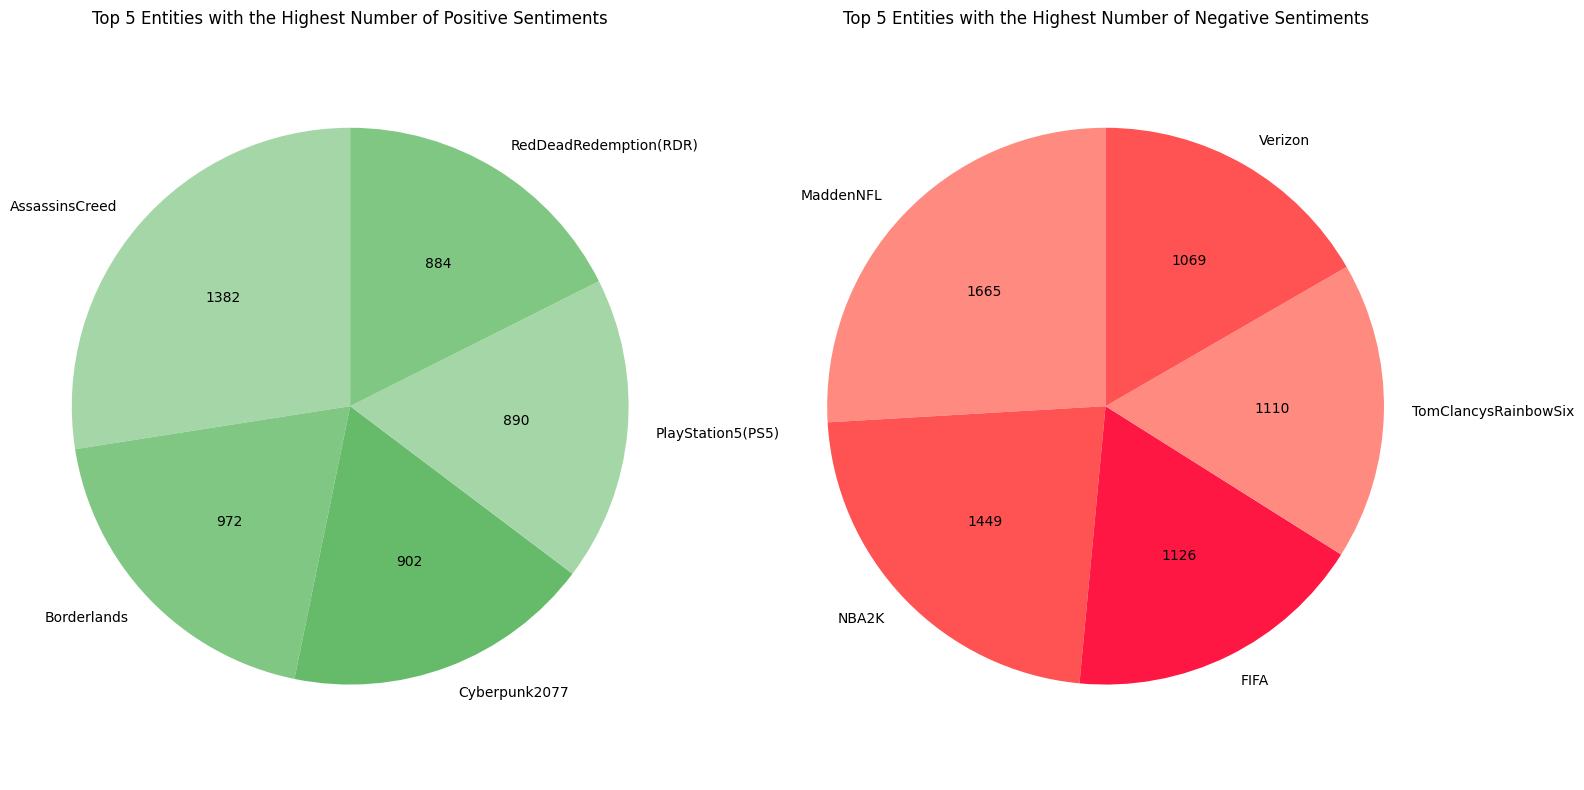

In [1515]:
# Create a figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Positive sentiment pie chart with dimmer colors
ax[0].pie(Top_5_postive_entity_counts, labels=Top_5_postive_entity_counts.index,
          autopct=lambda p: f'{int(p * sum(Top_5_postive_entity_counts) / 100)}',
          startangle=90, colors=['#A5D6A7', '#81C784', '#66BB6A'])  # Dimmer green shades
ax[0].set_title('Top 5 Entities with the Highest Number of Positive Sentiments')
ax[0].axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Negative sentiment pie chart with dimmer colors
ax[1].pie(Top_5_negative_entities, labels=Top_5_negative_entities.index,
          autopct=lambda p: f'{int(p * sum(Top_5_negative_entities) / 100)}',
          startangle=90, colors=['#FF8A80', '#FF5252', '#FF1744'])  # Dimmer red shades
ax[1].set_title('Top 5 Entities with the Highest Number of Negative Sentiments')
ax[1].axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Show the plot
plt.tight_layout()
plt.show()


#### *Top 5 Entities with the Highest Number of Positive Sentiments:*
---
- **Gaming Dominance**: *The top five entities with the highest number of positive sentiments are all related to gaming, indicating a strong positive sentiment towards the gaming industry.*
- **Assassins Creed and Red Dead Redemption**: *These two franchises stand out with the highest number of positive sentiments, suggesting they are particularly well-received by the gaming community.*
- **PlayStation 5 Popularity**: *The PlayStation 5, with a significant number of positive sentiments, highlights its popularity and positive reception among gamers.*

#### *Top 5 Entities with the Highest Number of Negative Sentiments:*


- **Madden NFL and NBA2K**: *The presence of these sports game franchises in the top five indicates that they have also received a significant amount of negative feedback, possibly due to gameplay issues or updates.*
- **FIFA and Tom Clancy's Rainbow Six**: *These games also appear in the top five, suggesting that they have also faced criticism or negative feedback from gamers.*

#### *Overall Observations:*

- **Gaming Industry Sentiment**: *The gaming industry appears to have a mixed bag of sentiment, with both strong positive and negative feedback for various games and platforms.*
- **Customer Service Issues**: *Verizon's high negative sentiment suggests potential issues with customer service or network performance.*
- **Game Development Challenges**: *The presence of popular game franchises in both positive and negative sentiment categories highlights the challenges game developers face in balancing player expectations and delivering quality experiences.*

---


### *Visulizing Attitudes towards the :Brands,Games,Platforms*

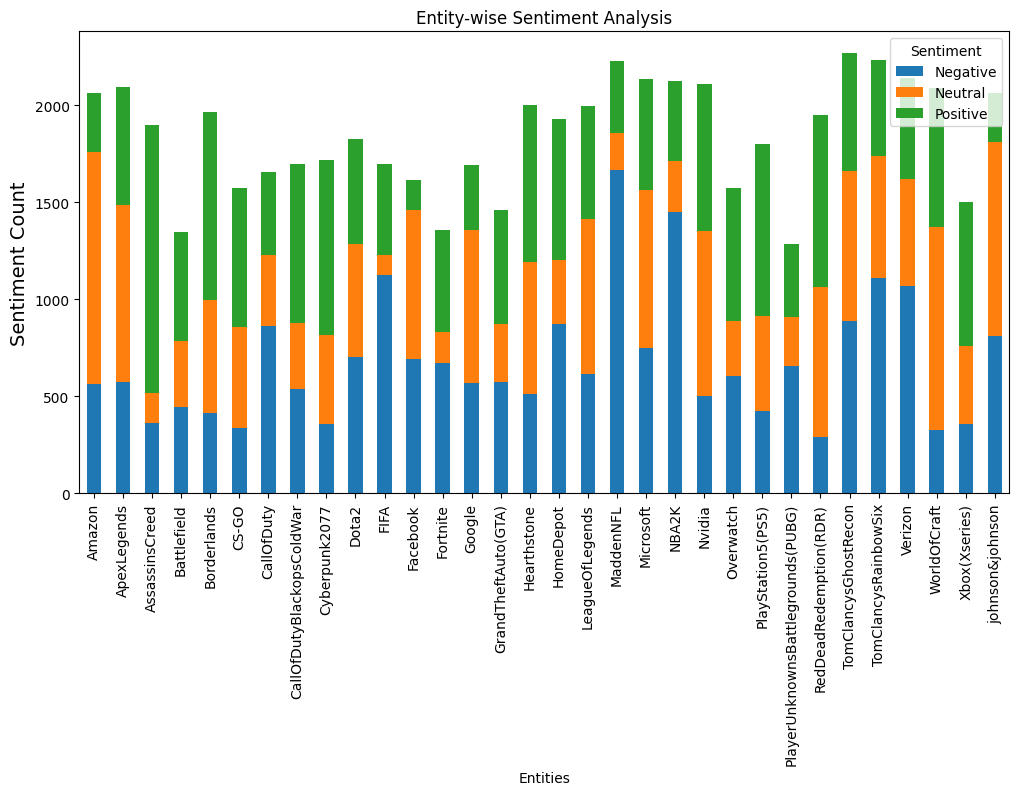

In [1516]:
# Group by 'entity' and 'sentiment'
entity_sentiment = sentiment.groupby(['Entity', 'Sentiment']).size().unstack().fillna(0)
entity_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Entity-wise Sentiment Analysis')
plt.xlabel('Entities')
plt.ylabel('Sentiment Count', fontsize=14)
plt.show()

### Interpretation of the Bar Graph: Sentiment Analysis Across All Entities
---
**`Analysis of Entities Based on Positive Sentiment`**

- *Top Positive Sentiment Entities*:
  - *AssassinsCreed*, *Borderlands*, and *Cyberpunk2077* have the highest positive sentiment counts. This indicates strong appreciation and satisfaction among users, showing these brands are particularly well-received.

- *Lowest Positive Sentiment Entity*:
  - *Johnson & Johnson* shows the lowest positive sentiment count, indicating less enthusiasm compared to others. This suggests mixed or lukewarm user perceptions, highlighting areas for improvement.

- *Mid-Range Positive Sentiment Entities*:
  - *ApexLegends*, *Overwatch*, and *HomeDepot* fall in the mid-range for positive sentiment. They are generally perceived positively but lack the high intensity seen in top entities. This suggests moderate user satisfaction but indicates room for enhancing user engagement.

- *The sentiment distribution reflects varying levels of user satisfaction, identifying which entities are perceived most favorably and which might need to boost their positive impact.*

---


### 
---
**`Analysis of Entities Based on Negative Sentiment`**

- *Top Negative Sentiment Entities*:
  - *MaddenNFL*, *FIFA*, and *NBA2K* are the entities with the highest negative sentiment counts. This indicates a substantial level of dissatisfaction, frustration, or criticism among users, suggesting these brands may face significant public perception challenges.

- *Lowest Negative Sentiment Entities*:
  - *WorldOfCraft*, *Xbox (Xseries)*, and *CS-GO* show the lowest counts of negative sentiments. This suggests that users generally hold a more favorable view of these entities, with fewer negative responses or complaints.

- *Mid-Range Negative Sentiment Entities*:
  - *Dota2*, *HomeDepot*, and *LeagueOfLegends* have a medium level of negative sentiment. This indicates some level of user criticism or frustration but to a lesser deree compared to the top negative entities, placing them in a more balanced sentiment position.

- *This distribution illustrates varying levels of user dissatisfaction across entities, highlighting which brands might benefit from addressing public concerns to improve sentiment.*

---


#### 
---

**`Analysis of Entities Based on Neutral Sentiment`**

- *Top Neutral Sentiment Entities*:
  - *Amazon*, *WorldOfCraft*, and *Johnson & Johnson* have the highest neutral sentiment counts. This suggests that users may have a balanced or indifferent view towards these entities, with limited strong opinions in either direction.

- *Lowest Neutral Sentiment Entities*:
  - *AssassinsCreed*, *Fortnite*, and *FIFA* show the lowest counts of neutral sentiments. This indicates that users tend to have stronger opinions (either positive or negative) about these entities, with fewer neutral responses.

- *Mid-Range Neutral Sentiment Entities*:
  - *CS-GO*, *Verizon*, and *Cyberpunk2077* display a medium level of neutral sentiment. This balanced sentiment suggests that users’ opinions on these brands are more varied, containing both neutral and polarized responses.

*This distribution reveals how users perceive these entities, with a spectrum ranging from indifference to strong opinions.*

---


#### *Recommendations* 

---

 **`Leverage Positive Sentiment`:**
- Brands exhibiting high positive sentiment, such as *AssassinsCreed* and *Cyberpunk2077*, should further enhance their positive brand perception by *rewarding loyal customers*, *offering exclusive content*, and *amplifying user-generated content*. These strategies will help maintain and strengthen user engagement, fostering deeper brand loyalty.

**`Address Negative Sentiment`:**
- Brands with significant negative sentiment, such as *MaddenNFL* and *NBA2K*, should conduct a thorough analysis of user feedback to identify specific negative points. Implementing *updates*, *enhancing features*, or addressing key concerns directly could mitigate dissatisfaction and improve perceptions. Similarly, brands like *Johnson & Johnson*, which exhibit lower positive sentiment, should focus on *rebuilding trust* through *transparency*, *effective communication*, and *enhanced product offerings*.

**`Enhance Engagement for Neutral Sentiment Brands`:**
- Brands such as *Amazon* and *WorldOfCraft*, which display high levels of neutral sentiment, should aim to convert neutral perceptions into more positive sentiment. This can be achieved by enhancing customer engagement through *personalized experiences*, *loyalty programs*, and the introduction of *innovative features*, thus increasing excitement and relevance among users.

- *These recommendations focus on improving brand perception through targeted actions, ultimately leading to enhanced user satisfaction and stronger brand loyalty.*

---